Attributes

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [3]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

##Prepocesamiento

##Exploración de datos

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [84]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,4137.582143,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,3784.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,3964.750000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,4139.500000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,4313.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,4483.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [62]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df[df['Income'].isnull()] #Visualizar datos nulos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
df.duplicated().sum() #Verificar si hay duplicados

#Limpieza de datos

In [5]:
df = df.dropna() #Eliminar valores nulos

In [6]:
df = df.drop(columns=['ID'], axis=1)

In [88]:
df.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [7]:
# Convertir Dt_Customer a formato de fecha
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [8]:
df['Dt_Customer']= (pd.to_datetime('today') - df['Dt_Customer']).dt.days #Convertir la variable a dias para que sea mas facil clusterizar

In [9]:
#Transformar variables categoricas a variables dummies
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)*1

#Escalamiento

In [11]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,1.529129,0.310532,0.978226,1.549429,1.690227,2.454568,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-1.236801,-0.234559,1.039938,0.909066,-1.188411,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.318822,0.769478,-0.823039,-0.928972,-0.205155,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,1.266777,-1.017239,1.039938,-0.928972,-1.059945,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.016420,0.240221,1.039938,-0.928972,-0.951244,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-1.007246,-0.444062,1.899228,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


#Reducir la dimensionalidad

In [18]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()
pca_df_scaled = pca.fit_transform(df_scaled)

In [30]:
pca.explained_variance_ratio_

array([1.88132693e-01, 6.38147783e-02, 5.63566722e-02, 5.08067680e-02,
       4.34236370e-02, 4.20233425e-02, 3.71708962e-02, 3.49420316e-02,
       3.46477871e-02, 3.15808402e-02, 3.11631206e-02, 2.98770670e-02,
       2.91238654e-02, 2.79489424e-02, 2.74004047e-02, 2.69208221e-02,
       2.33367682e-02, 2.25577398e-02, 2.06955882e-02, 1.98127447e-02,
       1.73400163e-02, 1.64325544e-02, 1.62025411e-02, 1.49307977e-02,
       1.40907989e-02, 1.26059508e-02, 1.21382824e-02, 1.15406053e-02,
       1.06256756e-02, 8.80912363e-03, 7.65735717e-03, 6.60418923e-03,
       5.54488302e-03, 3.70629147e-03, 3.44231127e-05, 6.38345790e-18,
       0.00000000e+00])

In [31]:
var = pca.explained_variance_ratio_

for i in range (1,len(var)):
  var[i] = var[i] + var[i-1]
  print(var[i])

0.25194747177300236
0.308304143970662
0.3591109120030458
0.40253454895305035
0.4445578914651908
0.4817287876937449
0.5166708193165277
0.5513186064446552
0.582899446668354
0.6140625672982114
0.6439396342743485
0.6730634996839561
0.7010124420893594
0.7284128467659701
0.755333668879944
0.778670437095232
0.8012281769354979
0.8219237651653943
0.8417365098706122
0.8590765261808442
0.8755090805544876
0.8917116216765574
0.9066424193573354
0.9207332182604956
0.9333391690759204
0.9454774515134822
0.9570180567855494
0.9676437323625605
0.9764528559967758
0.9841102131653603
0.9907144023985391
0.9962592854213737
0.9999655768872522
1.0000000000000007
1.0000000000000007
1.0000000000000007


In [34]:
pca_df_scaled = pd.DataFrame(pca_df_scaled)

In [35]:
pca_df_scaled

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,3.862676,-0.579248,-0.426391,2.836572,-1.056285,-1.755969,-0.933596,0.237504,0.524425,0.035000,...,-1.053385,0.854463,0.367454,0.289432,-0.811676,-0.163101,0.041632,0.007402,-7.173533e-16,-1.901465e-16
1,-2.383103,-0.689887,-0.308827,-0.446583,-0.950005,0.771970,-1.948831,1.043130,0.407307,-1.174305,...,-0.171791,-0.004719,0.297285,0.043621,-0.204741,0.045424,-0.047844,-0.001309,-3.728442e-16,-2.266448e-16
2,1.641552,-0.434782,-1.381755,-0.096989,-1.293149,0.761041,0.785470,-0.779456,-0.231280,-0.524229,...,0.518884,0.772259,-0.597857,-0.282318,-0.191444,0.031501,0.102083,0.002703,8.385059e-16,6.010975e-16
3,-2.520692,-1.635951,-0.092450,0.122479,-1.147047,1.169334,0.909671,-0.781400,-0.370184,-0.858727,...,0.242744,0.021387,0.144394,0.004265,-0.040870,0.123405,0.122312,-0.000343,2.209079e-16,1.443788e-16
4,-0.510363,0.153764,-0.102680,-0.823719,1.782971,-0.837913,0.070654,-1.310101,0.966530,-0.286994,...,0.104532,0.028381,-0.705809,-0.261173,-0.345173,-0.003627,0.276748,0.004323,5.837094e-16,1.464453e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2.402226,0.642667,-2.011909,1.555286,1.426058,0.366693,0.031009,-0.039166,-0.354520,0.072705,...,-0.628907,-0.962153,0.828037,0.373851,0.000499,1.089647,-0.021696,0.002128,-2.389121e-15,-2.086613e-15
2212,-1.013904,2.884244,1.173328,-0.927089,-0.884842,0.799748,0.533362,-1.390024,-0.323648,-1.685949,...,0.208287,-0.633564,0.169131,-0.423072,-0.167463,0.185047,0.055383,0.000748,-2.467863e-16,-8.516873e-16
2213,1.464889,-0.066913,0.556141,-0.111903,-0.503664,2.173640,-1.053569,1.027103,0.910056,2.052098,...,0.863406,-0.303097,0.351773,1.376295,0.074665,-0.109658,-0.023267,-0.006792,-1.295266e-17,5.882565e-16
2214,1.670365,1.154509,-1.056787,-2.085952,-1.381078,-0.442832,1.831474,1.234512,-1.024671,-0.858665,...,0.235607,0.434814,0.301738,-0.029092,-0.127551,-0.403543,0.182280,0.005107,9.197701e-17,1.369931e-16


In [36]:
pca_df_scaled.columns

RangeIndex(start=0, stop=37, step=1)

In [39]:
pca_df_scaled = pd.DataFrame(pca_df_scaled).drop([18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36],axis=1)
pca_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.862676,-0.579248,-0.426391,2.836572,-1.056285,-1.755969,-0.933596,0.237504,0.524425,0.035000,0.549223,-0.230570,0.373252,-0.040793,-0.669233,-0.074580,-0.189570,1.591770
1,-2.383103,-0.689887,-0.308827,-0.446583,-0.950005,0.771970,-1.948831,1.043130,0.407307,-1.174305,0.672126,-0.068162,-0.085917,-0.606655,0.403013,-0.194445,-0.901554,0.281849
2,1.641552,-0.434782,-1.381755,-0.096989,-1.293149,0.761041,0.785470,-0.779456,-0.231280,-0.524229,0.271646,0.907942,-0.105843,-0.024518,0.290646,-0.875739,0.544432,0.080350
3,-2.520692,-1.635951,-0.092450,0.122479,-1.147047,1.169334,0.909671,-0.781400,-0.370184,-0.858727,0.007407,0.813977,-0.197789,-0.052681,-0.561365,-0.393152,0.242808,-0.831092
4,-0.510363,0.153764,-0.102680,-0.823719,1.782971,-0.837913,0.070654,-1.310101,0.966530,-0.286994,-1.304017,-0.856566,-0.268099,0.304954,-1.218840,0.807920,0.044241,-1.604590


#Clustering

In [40]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [41]:
sum_of_squared_distances = []
silhouette_coefficients = []

k = range(2,15)
for i in k:
    km = KMeans(n_clusters=i)
    y = km.fit_predict(pca_df_scaled)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_coefficients.append(silhouette_score(pca_df_scaled, y))

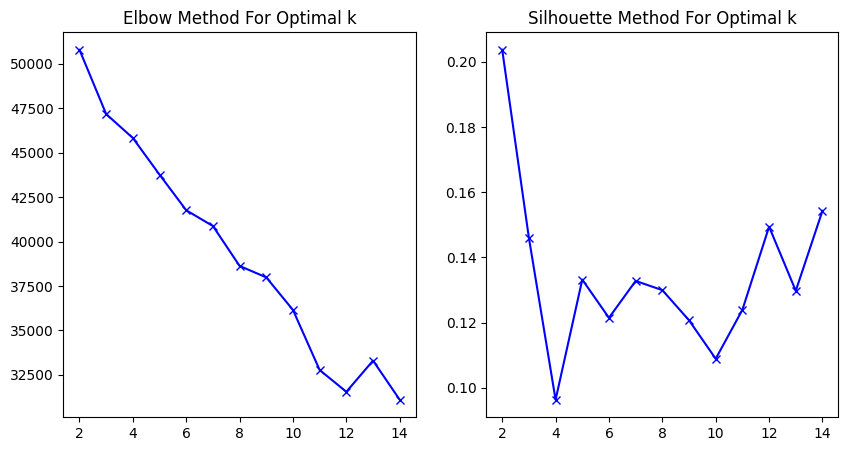

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(k, sum_of_squared_distances, 'bx-')
axes[0].set_title('Elbow Method For Optimal k')

axes[1].plot(k, silhouette_coefficients, 'bx-')
axes[1].set_title('Silhouette Method For Optimal k')

plt.show()

In [48]:
KM = KMeans(n_clusters=2)
y = KM.fit_predict(pca_df_scaled)
print(silhouette_score(pca_df_scaled, y))

0.2036901250662538


In [49]:
df['kmeans_pca1'] = y

### **El silhouette_score fue muy bajo, asi que probare seleccionando unas caracteristicas que encuentre mas relevantes para pasarle menos variables a mi modelo y a ver si asi mejora**

#SEGUNDO MODELO

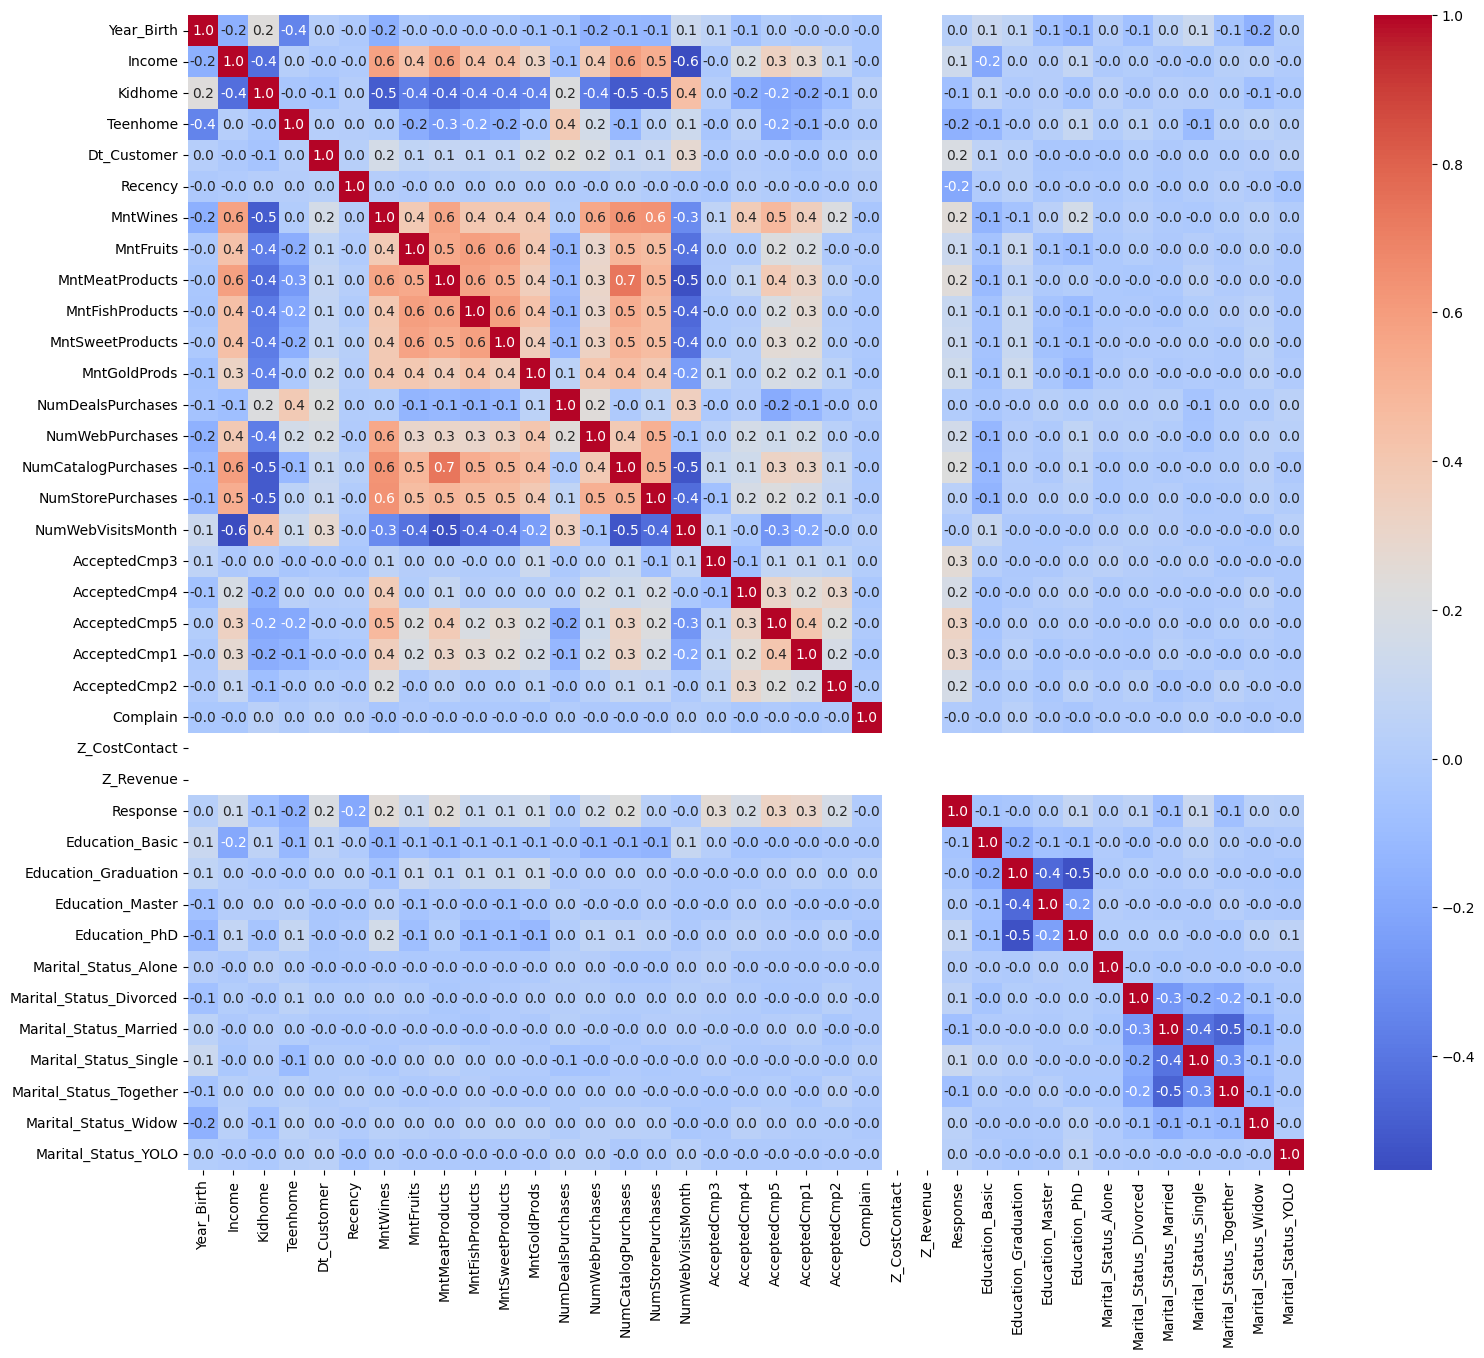

In [52]:
#Visualizar algunas correlaciones para ver que seleccionamos
plt.figure(figsize=(18, 15))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [55]:
df_2 = df.copy()

In [74]:
df_2['AcceptedCmp1&2'] = np.where((df['AcceptedCmp1'] == 1) | (df['AcceptedCmp2'] == 1), 1, 0)
df_2['expenses'] = df_2['MntWines'] + df_2['MntFruits'] + df_2['MntMeatProducts'] + df_2['MntFishProducts'] + df_2['MntSweetProducts'] + df_2['MntGoldProds']
df_2['purchases'] = df_2['NumDealsPurchases'] + df_2['NumWebPurchases'] + df_2['NumCatalogPurchases'] + df_2['NumStorePurchases'] + df_2['NumWebVisitsMonth']
df_2.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,kmeans_pca1,AcceptedCmp1&2,expenses,purchases
0,1957,58138.0,0,0,4447,58,635,88,546,172,...,0,0,1,0,0,0,0,0,1617,32
1,1954,46344.0,1,1,3897,38,11,1,6,2,...,0,0,1,0,0,0,1,0,27,11
2,1965,71613.0,0,0,4096,26,426,49,127,111,...,0,0,0,1,0,0,0,0,776,25
3,1984,26646.0,1,0,3923,26,11,4,20,10,...,0,0,0,1,0,0,1,0,53,14
4,1981,58293.0,1,0,3945,94,173,43,118,46,...,0,1,0,0,0,0,1,0,422,24


In [75]:
df_scaled_2 = scaler.fit_transform(df_2)
df_scaled_2 = pd.DataFrame(df_scaled_2, columns=df_2.columns)
df_scaled_2.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,kmeans_pca1,AcceptedCmp1&2,expenses,purchases
0,-0.986443,0.234063,-0.823039,-0.928972,1.529129,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056,-1.236802,-0.278023,1.675488,1.620547
1,-1.236801,-0.234559,1.039938,0.909066,-1.188411,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056,0.808537,-0.278023,-0.962358,-1.263455
2,-0.318822,0.769478,-0.823039,-0.928972,-0.205155,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056,-1.236802,-0.278023,0.280250,0.659213
3,1.266777,-1.017239,1.039938,-0.928972,-1.059945,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056,0.808537,-0.278023,-0.919224,-0.851455
4,1.016420,0.240221,1.039938,-0.928972,-0.951244,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056,0.808537,-0.278023,-0.307044,0.521879


In [76]:
#Variables que seleccione segun correlaciones y mis preferencias
features = df_2[['Income','Year_Birth','Complain','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
                         'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'AcceptedCmp1&2',	'expenses',	'purchases']]

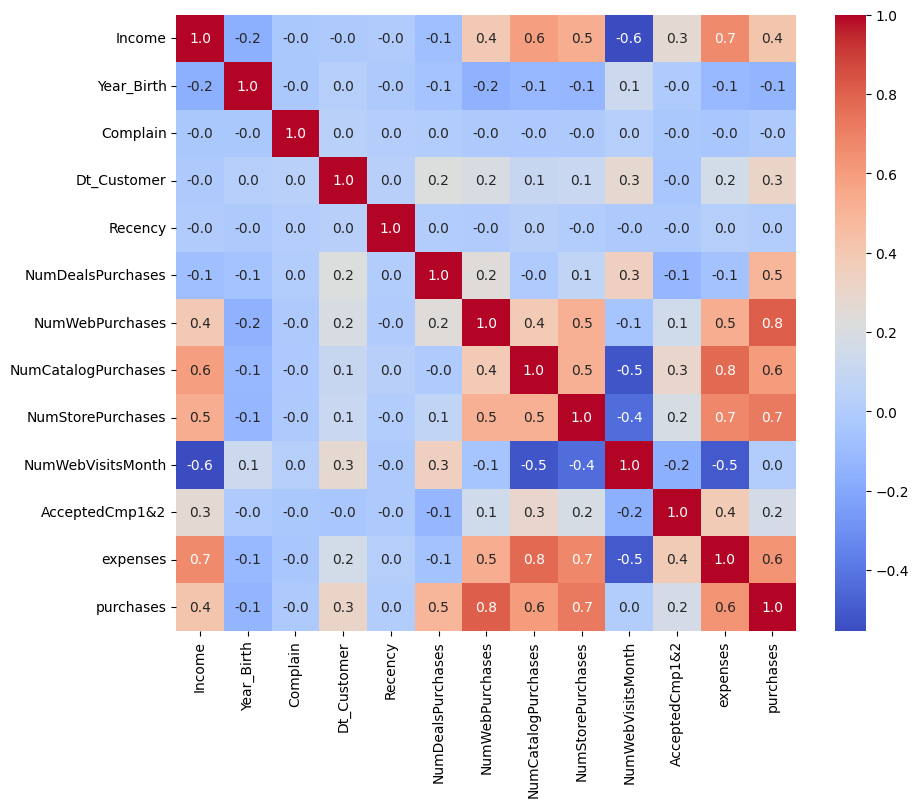

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [71]:
sns.pairplot(features)

Output hidden; open in https://colab.research.google.com to view.

In [78]:
features = df_scaled_2[['Income','Year_Birth','Dt_Customer', 'Recency', 'NumDealsPurchases',
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'AcceptedCmp1&2',	'expenses',	'purchases']]

In [84]:
#PCA
pca = PCA()
pca_df2 = pca.fit_transform(features)


In [85]:
pca.explained_variance_ratio_

array([0.36264628, 0.17086376, 0.08661596, 0.08381608, 0.0712081 ,
       0.06691691, 0.0493003 , 0.03668666, 0.03480163, 0.02324395,
       0.01390036, 0.        ])

In [86]:
var = pca.explained_variance_ratio_

for i in range (1,len(var)):
  var[i] = var[i] + var[i-1]
  print(var[i])

0.5335100411168856
0.620125999885274
0.7039420828216731
0.7751501854569907
0.8420670983483931
0.8913673977419427
0.928054056538282
0.9628556858811058
0.9860996358990671
1.0
1.0


In [88]:
pca_df2 = pd.DataFrame(pca_df2).drop([7,8,9,10,11],axis=1)
pca_df2.head()

,0,1,2,3,4,5,6
0,2.706727,1.704860,-0.186822,0.531705,0.436811,1.308880,0.386145
1,-2.045496,-1.204081,-1.350332,-0.790165,0.578928,-0.028597,0.502887
2,1.608329,-0.131897,-0.317162,-0.977162,-0.590157,0.009405,-1.456872
3,-2.272407,-0.483992,0.803163,-0.725788,-0.561446,-0.923528,-0.113180
4,0.210978,0.611423,-0.299574,1.281033,-0.697188,-1.949429,0.582624


In [89]:
sum_of_squared_distances = []
silhouette_coefficients = []

k = range(2,15)
for i in k:
    km = KMeans(n_clusters=i)
    y = km.fit_predict(pca_df2)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_coefficients.append(silhouette_score(pca_df2, y))

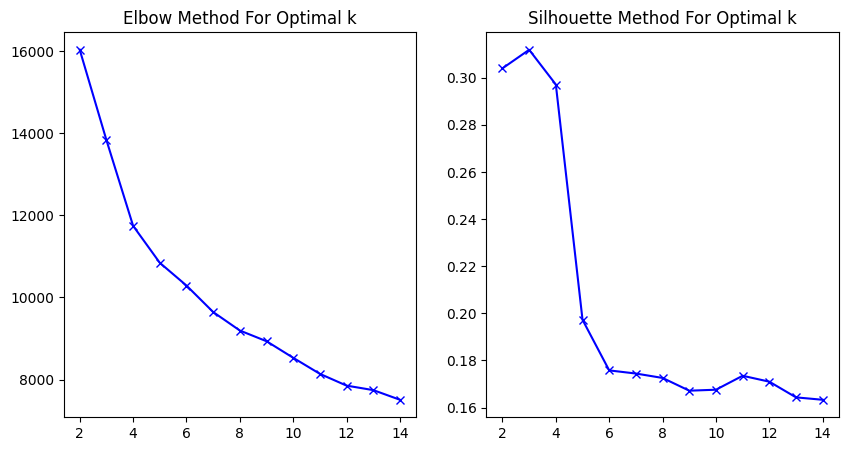

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(k, sum_of_squared_distances, 'bx-')
axes[0].set_title('Elbow Method For Optimal k')

axes[1].plot(k, silhouette_coefficients, 'bx-')
axes[1].set_title('Silhouette Method For Optimal k')

plt.show()

In [99]:
KM = KMeans(n_clusters=4)
y = KM.fit_predict(pca_df2)
print(silhouette_score(pca_df2, y))

0.29715366826130724


In [103]:
df_2['kmeans_pca2'] = y

In [112]:
visualizacion = df_2[['Income','Year_Birth','Dt_Customer', 'Recency', 'NumDealsPurchases',
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'AcceptedCmp1&2',	'expenses',	'purchases','kmeans_pca2']]

In [113]:
sns.pairplot(visualizacion, hue='kmeans_pca2')

Output hidden; open in https://colab.research.google.com to view.

In [114]:
visualizacion[visualizacion['kmeans_pca2']==3]

,Income,Year_Birth,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1&2,expenses,purchases,kmeans_pca2
15,82800.0,1946,4366,23,1,7,6,12,3,1,1315,29,3
18,76995.0,1949,4242,91,2,11,4,9,5,1,1782,31,3
53,82582.0,1977,3806,54,1,4,9,7,1,1,1617,22,3
67,88194.0,1979,3886,19,1,11,10,10,5,1,1274,37,3
87,50388.0,1957,3816,3,4,6,1,6,7,1,372,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,65706.0,1970,4150,77,1,11,3,12,7,1,1199,34,3
2174,65210.0,1955,3895,25,2,9,3,8,6,1,731,28,3
2175,79174.0,1975,4318,2,1,5,6,7,2,1,2043,21,3
2193,82347.0,1957,4384,38,1,7,7,10,3,1,1853,28,3


<Axes: xlabel='Income', ylabel='purchases'>

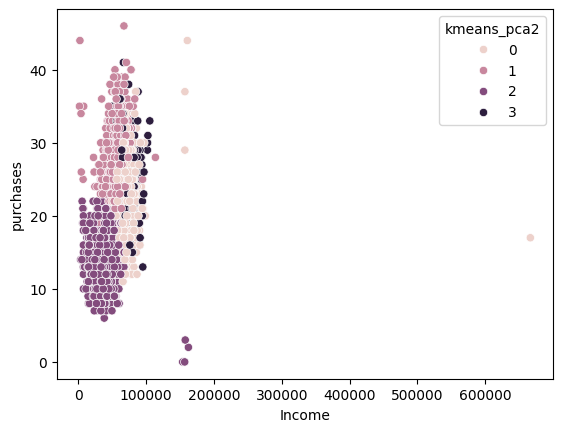

In [105]:
sns.scatterplot(data=df_2, x='Income', y='purchases', hue='kmeans_pca2')

<Axes: xlabel='Income', ylabel='Year_Birth'>

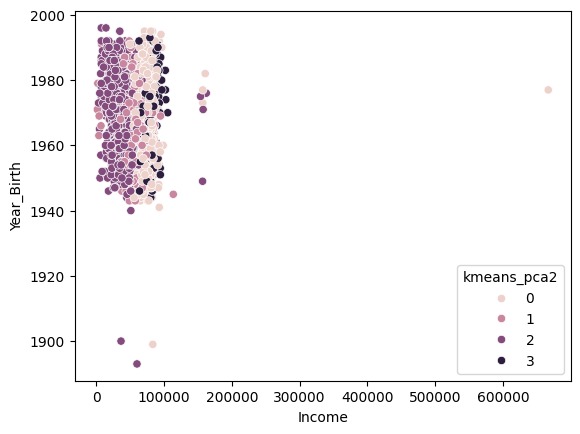

In [106]:
sns.scatterplot(data=df_2, x='Income', y='Year_Birth', hue='kmeans_pca2')


https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/